In [1]:
# %matplotlib widget
# Load packages and settings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)
import seaborn as sns


import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['figure.facecolor'] = (1,1,1,1)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)
from matplotlib import cm # Colormaps
import matplotlib.colors as colors
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# ax1.spines['top'].set_visible(False) 

import os
# import csv
import math

from datetime import date


saveFigures = True
# saveFigures = False
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

# Define running mean functions
def rnMean(data,meanWidth):
    return np.convolve(data, np.ones(meanWidth)/meanWidth, mode='valid')
def rnTime(t,meanWidth):
    return t[math.floor(meanWidth/2):-math.ceil(meanWidth/2)+1]

saveFigures is set to: True
Done loading packages


In [2]:
filePath= '../InternationalData/WHO_ExcessMortality2022/'
filePath= '../ExcessData/'
fileName = 'WHO_COVID_Excess_Deaths_EstimatesByCountry.xlsx'

# df = pd.read_excel(filePath+fileName)

sheet_to_df_map = pd.read_excel(filePath+fileName, sheet_name=None)

In [3]:
df =  sheet_to_df_map['Country by year and month']

In [4]:
df.columns = df.iloc[11]
df = df.iloc[12:]
df['cumul.excess.low'] = pd.to_numeric(df['cumul.excess.low'])
df['cumul.excess.high'] = pd.to_numeric(df['cumul.excess.high'])

C:\Users\rakrpe\AppData\Local\Temp\ipykernel_45684\2216490198.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cumul.excess.low'] = pd.to_numeric(df['cumul.excess.low'])
C:\Users\rakrpe\AppData\Local\Temp\ipykernel_45684\2216490198.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cumul.excess.high'] = pd.to_numeric(df['cumul.excess.high'])


In [5]:
dfDK = df[df.country == 'Denmark']
# dfDE = df[df.country == 'Germany']
dfSE = df[df.country == 'Sweden']

In [6]:

curDates = [np.datetime64(str(row.year)+'-'+(str(row.month).zfill(2))) for row in dfDK.iloc]


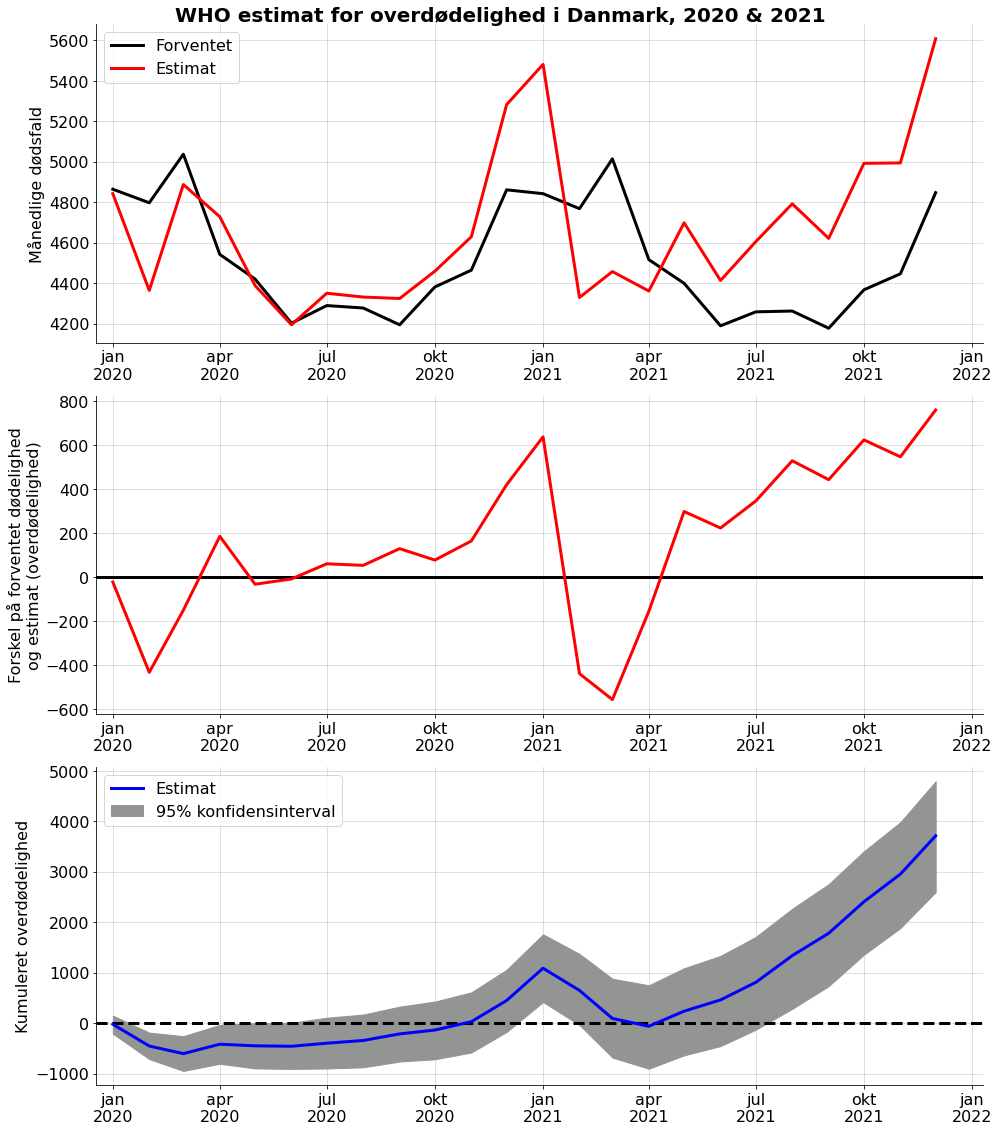

In [7]:
# Test figur

# fig,(ax,ax2) = plt.subplots(2,1)
fig,(ax,ax2,ax3) = plt.subplots(3,1,figsize=(14,16))
# ax.plot(curDates,dfDK['excess.mean'],'r')

# ax.step(curDates,dfDK['expected.mean'],'k',where='mid')
# ax.step(curDates,dfDK['acm.mean'],'r',where='mid')
ax.plot(curDates,dfDK['expected.mean'],'k',label='Forventet')
ax.plot(curDates,dfDK['acm.mean'],'r',label='Estimat')

ax2.axhline(0,color='k')
ax2.plot(curDates,dfDK['excess.mean'],'r')

ax3.axhline(0,color='k',linestyle='--',zorder=4)
ax3.plot(curDates,dfDK['cumul.excess.mean'],'b',zorder=5,label='Estimat')
ax3.fill_between(curDates,dfDK['cumul.excess.high'],dfDK['cumul.excess.low'],color='xkcd:grey',zorder=3,label='95% konfidensinterval')

# ax3.grid(axis='y',alpha=0.5)
ax.grid(alpha=0.5)
ax2.grid(alpha=0.5)
ax3.grid(alpha=0.5)
ax3.set_axisbelow(True)

ax.set_ylabel('Månedlige dødsfald')
ax2.set_ylabel('Forskel på forventet dødelighed\nog estimat (overdødelighed)')
ax3.set_ylabel('Kumuleret overdødelighed')


ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))

ax.set_xlim([curDates[0]-np.timedelta64(14,'D'),curDates[-1]+np.timedelta64(40,'D')])
ax2.set_xlim([curDates[0]-np.timedelta64(14,'D'),curDates[-1]+np.timedelta64(40,'D')])
ax3.set_xlim([curDates[0]-np.timedelta64(14,'D'),curDates[-1]+np.timedelta64(40,'D')])


ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)  
ax2.spines['top'].set_visible(False) 
ax2.spines['right'].set_visible(False)  
ax3.spines['top'].set_visible(False) 
ax3.spines['right'].set_visible(False)  

ax.legend(loc='upper left')
ax3.legend(loc='upper left')

fig.suptitle('WHO estimat for overdødelighed i Danmark, 2020 & 2021',fontsize=20,fontweight='bold')
fig.tight_layout()

In [8]:
fileName2 = 'excess-deaths-cumulative-economist-single-entity.csv'
df2 = pd.read_csv(filePath+fileName2)

In [9]:
df2DK = df2[df2.Code=='DNK']
df2SE = df2[df2.Code=='SWE']

In [10]:
df2DK['Day'] = pd.to_datetime(df2DK['Day'])
df2SE['Day'] = pd.to_datetime(df2SE['Day'])

C:\Users\rakrpe\AppData\Local\Temp\ipykernel_45684\3464420650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2DK['Day'] = pd.to_datetime(df2DK['Day'])
C:\Users\rakrpe\AppData\Local\Temp\ipykernel_45684\3464420650.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2SE['Day'] = pd.to_datetime(df2SE['Day'])


In [11]:

lastIndexSE = np.where([df2SE.Day == np.datetime64('2022-07-02')])[1][0]
lastIndexDK = np.where([df2DK.Day == np.datetime64('2022-07-02')])[1][0]
df2DK = df2DK.iloc[:lastIndexDK+1]
df2SE = df2SE.iloc[:lastIndexDK+1]

In [12]:
# df2.Code.unique()
df2DK.columns
# df2DK.iloc[:int(len(df2DK)/2),:]
# df2DK[df2DK.Day == np.datetime64('2020-03-14')]

Index(['Entity', 'Code', 'Day', 'cumulative_estimated_daily_excess_deaths',
       'Total confirmed deaths due to COVID-19',
       'cumulative_estimated_daily_excess_deaths_ci_95_top',
       'cumulative_estimated_daily_excess_deaths_ci_95_bot'],
      dtype='object')

In [13]:
# df2DK['Day']

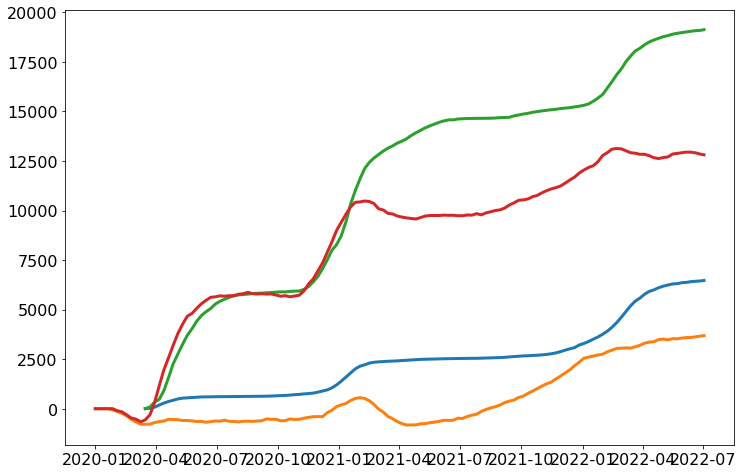

In [14]:
fig,ax = plt.subplots()

# ax.plot(df2DK.Day,df2DK['Total confirmed deaths due to COVID-19'])
ax.plot(df2DK.Day,df2DK['Total confirmed deaths due to COVID-19'])
ax.plot(df2DK.Day,df2DK['cumulative_estimated_daily_excess_deaths'])
ax.plot(df2SE.Day,df2SE['Total confirmed deaths due to COVID-19'])
ax.plot(df2SE.Day,df2SE['cumulative_estimated_daily_excess_deaths'])

(-2000.0, 20000.0)

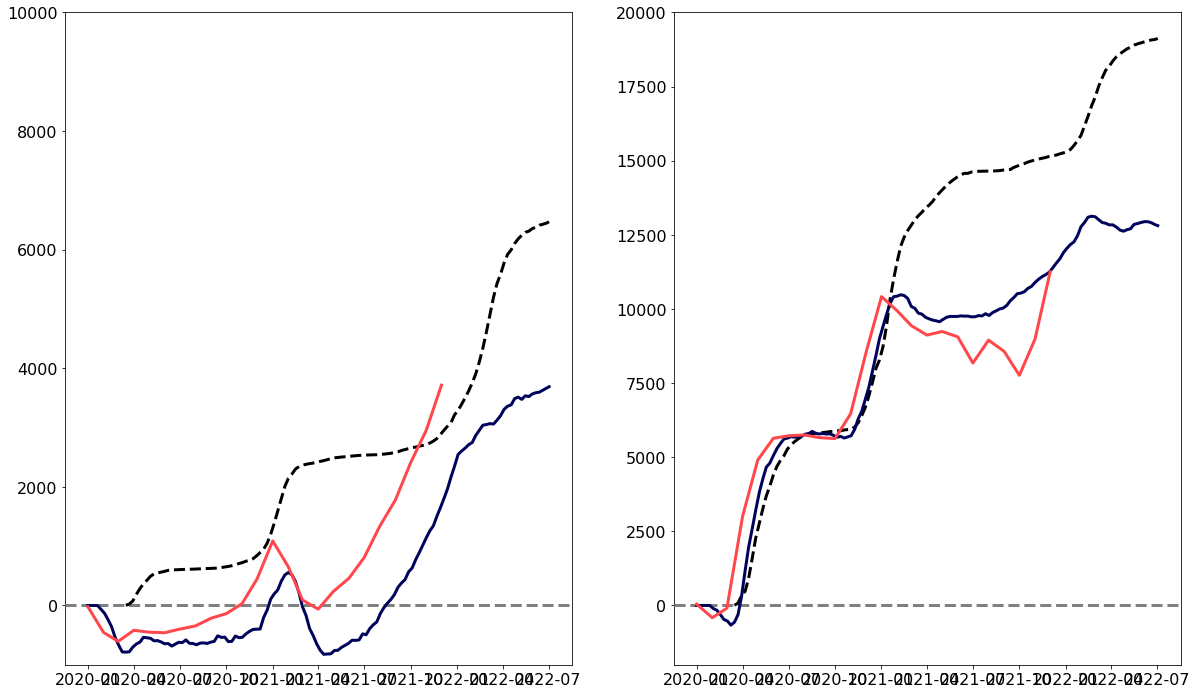

In [15]:
fig,(ax,ax2) = plt.subplots(1,2,figsize=(20,12))
# fig,(ax,ax2) = plt.subplots(2,1,figsize=(18,20))

# ax.axhline(0,color='gray')
ax.axhline(0,color='gray',linestyle='--',zorder=4)
ax.plot(df2DK.Day,df2DK['Total confirmed deaths due to COVID-19'],'--',zorder=5,label='COVID-19 registrerede dødsfald',color='k')

# ax.fill_between(df2DK.Day,df2DK['cumulative_estimated_daily_excess_deaths_ci_95_bot'],df2DK['cumulative_estimated_daily_excess_deaths_ci_95_top'],color='xkcd:light blue')
ax.plot(df2DK.Day,df2DK['cumulative_estimated_daily_excess_deaths'],zorder=5,color='xkcd:dark blue')


ax.plot(curDates,dfDK['cumul.excess.mean'],'xkcd:light red',zorder=5,label='Estimat')
# ax.fill_between(curDates,dfDK['cumul.excess.high'],dfDK['cumul.excess.low'],color='xkcd:light brown',zorder=3,label='95% konfidensinterval')


ax2.axhline(0,color='gray',linestyle='--',zorder=4)
ax2.plot(df2SE.Day,df2SE['Total confirmed deaths due to COVID-19'],'--',zorder=5,label='COVID-19 registrerede dødsfald',color='k')

# ax2.fill_between(df2SE.Day,df2SE['cumulative_estimated_daily_excess_deaths_ci_95_bot'],df2SE['cumulative_estimated_daily_excess_deaths_ci_95_top'],color='xkcd:light blue')
ax2.plot(df2SE.Day,df2SE['cumulative_estimated_daily_excess_deaths'],zorder=5,color='xkcd:dark blue')


ax2.plot(curDates,dfSE['cumul.excess.mean'],'xkcd:light red',zorder=5,label='Estimat')
# ax2.fill_between(curDates,dfSE['cumul.excess.high'],dfSE['cumul.excess.low'],color='xkcd:light brown',zorder=3,label='95% konfidensinterval')


ax.set_ylim([-1000,10000])
ax2.set_ylim([-2000,20000])
# ax.set_ylim(bottom=-2000)
# ax2.set_ylim(bottom=-2000)

In [16]:
fileName3 = 'IHME_EM_COVID_19_2020_2021_DATA_Y2022M03D10.csv'

df3 = pd.read_csv(filePath+fileName3,encoding='latin-1')

In [17]:
df3DK = df3[df3.location_name == 'Denmark']
df3SE = df3[df3.location_name == 'Sweden']

In [18]:
fileName4 = 'world_mortality.csv'
df4 = pd.read_csv(filePath+fileName4)

In [19]:
# df4DK = df4[df4.iso3c == 'DNK']
# df4DK = df4[df4.iso3c == 'DNK']

In [20]:
fileName5 = 'demo_mexrt__custom_3047466_page_linear.csv'
df5 = pd.read_csv(filePath+fileName5)

In [21]:
df5['TIME_PERIOD'] = pd.to_datetime(df5['TIME_PERIOD'])

In [22]:
df5DK = df5[df5.geo == 'DK']
df5SE = df5[df5.geo == 'SE']

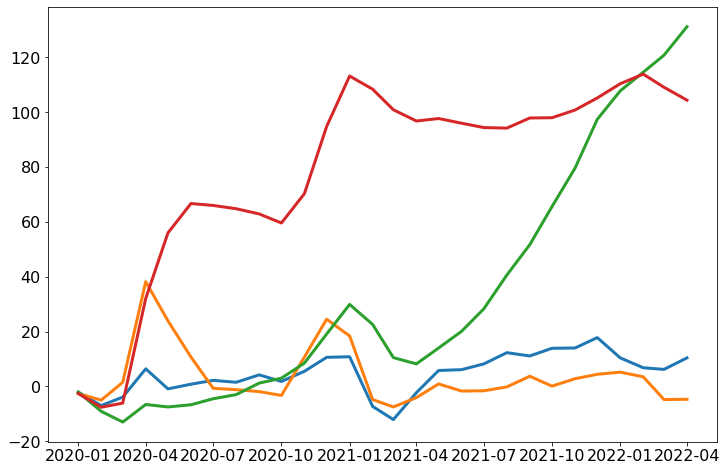

In [23]:
fig,ax = plt.subplots()
ax.plot(df5DK.TIME_PERIOD,df5DK.OBS_VALUE)
ax.plot(df5SE.TIME_PERIOD,df5SE.OBS_VALUE)
ax.plot(df5DK.TIME_PERIOD,np.cumsum(df5DK.OBS_VALUE))
ax.plot(df5SE.TIME_PERIOD,np.cumsum(df5SE.OBS_VALUE))

In [24]:
# dfDK.columns
# dfDK

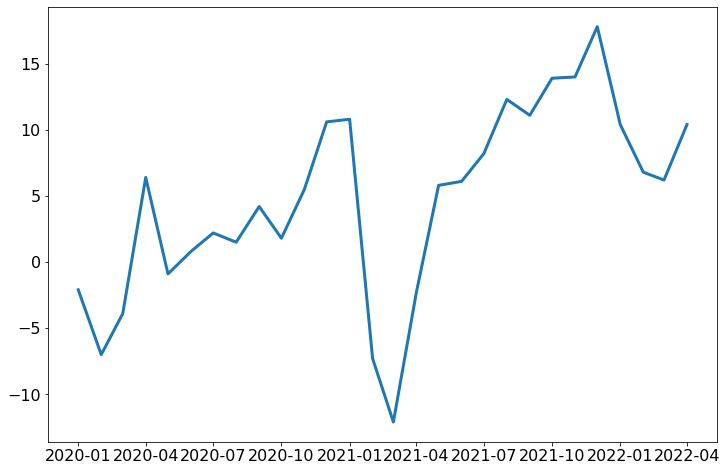

In [25]:
fig,ax = plt.subplots()
# ax.plot(curDates,dfDK['expected.mean'])
ax.plot(df5DK.TIME_PERIOD,df5DK.OBS_VALUE)
# ax.plot(df5SE.TIME_PERIOD,df5SE.OBS_VALUE)

In [26]:
fileName6 = 'excess_mortality.csv'
df6 = pd.read_csv(filePath+fileName6)
df6['date'] = pd.to_datetime(df6['date'])

In [27]:
df6DK = df6[df6.location=='Denmark']
df6SE = df6[df6.location=='Sweden']

In [28]:
df6.columns

Index(['location', 'date', 'p_scores_all_ages', 'p_scores_15_64',
       'p_scores_65_74', 'p_scores_75_84', 'p_scores_85plus',
       'deaths_2020_all_ages', 'average_deaths_2015_2019_all_ages',
       'deaths_2015_all_ages', 'deaths_2016_all_ages', 'deaths_2017_all_ages',
       'deaths_2018_all_ages', 'deaths_2019_all_ages', 'deaths_2010_all_ages',
       'deaths_2011_all_ages', 'deaths_2012_all_ages', 'deaths_2013_all_ages',
       'deaths_2014_all_ages', 'deaths_2021_all_ages', 'time', 'time_unit',
       'p_scores_0_14', 'projected_deaths_2020_2022_all_ages',
       'excess_proj_all_ages', 'cum_excess_proj_all_ages',
       'cum_proj_deaths_all_ages', 'cum_p_proj_all_ages', 'p_proj_all_ages',
       'p_proj_0_14', 'p_proj_15_64', 'p_proj_65_74', 'p_proj_75_84',
       'p_proj_85p', 'cum_excess_per_million_proj_all_ages',
       'excess_per_million_proj_all_ages', 'deaths_2022_all_ages',
       'deaths_2020_2022_all_ages'],
      dtype='object')

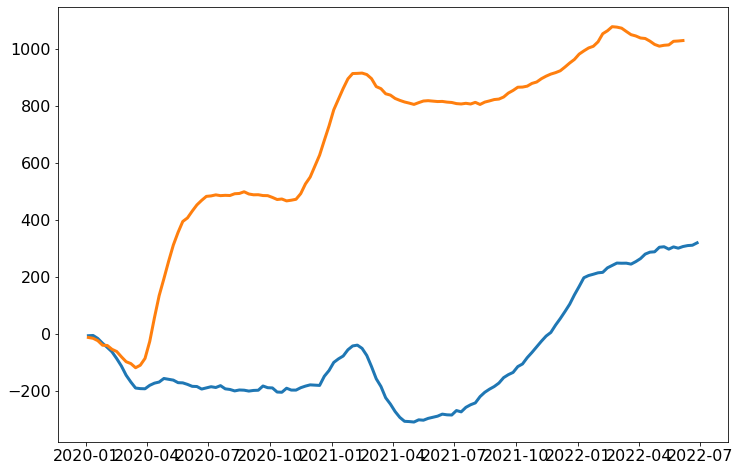

In [29]:
fig,ax = plt.subplots()
# ax.plot(df6DK.date,df6DK['cum_excess_proj_all_ages'])
# ax.plot(df6SE.date,df6SE['cum_excess_proj_all_ages'])
ax.plot(df6DK.date,df6DK['cum_excess_per_million_proj_all_ages'])
ax.plot(df6SE.date,df6SE['cum_excess_per_million_proj_all_ages'])

In [30]:

popDK = 5.831 * 1000000
popSE = 10.35 * 1000000

In [31]:
curYlim = ax.get_ylim()

curYlim[0]/popDK

-6.486646529497693e-05

In [61]:
# fig,ax = plt.subplots()
# ax2 = ax.twinx()

# fig.patch.set_facecolor('xkcd:off white')
# ax.set_facecolor('xkcd:off white')


# ax.axhline(0,color='gray',zorder=2)
# ax.plot(df2DK.Day,df2DK['cumulative_estimated_daily_excess_deaths'],zorder=5,color='xkcd:dark blue',label='The Economist')
# ax2.plot(df2DK.Day,1000*df2DK['cumulative_estimated_daily_excess_deaths']/popDK,zorder=5,color='xkcd:dark blue',label='The Economist')



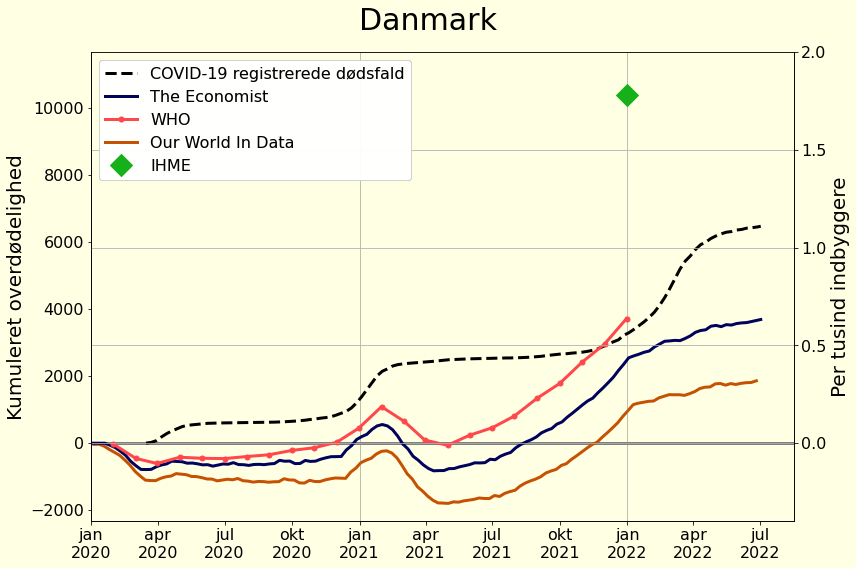

In [82]:
fig,ax = plt.subplots()
ax2 = ax.twinx()

fig.patch.set_facecolor('xkcd:off white')
ax.set_facecolor('xkcd:off white')


ax.axhline(0,color='gray',zorder=2)
ax.plot(df2DK.Day,df2DK['Total confirmed deaths due to COVID-19'],'--',zorder=5,label='COVID-19 registrerede dødsfald',color='k')
# ax2.plot(df2DK.Day,df2DK['Total confirmed deaths due to COVID-19']/popDK,'--',zorder=5,label='COVID-19 registrerede dødsfald',color='k')

# ax.fill_between(df2DK.Day,df2DK['cumulative_estimated_daily_excess_deaths_ci_95_bot'],df2DK['cumulative_estimated_daily_excess_deaths_ci_95_top'],color='xkcd:light blue')
ax.plot(df2DK.Day,df2DK['cumulative_estimated_daily_excess_deaths'],zorder=5,color='xkcd:dark blue',label='The Economist')


# ax.plot(curDates,dfDK['cumul.excess.mean'],'xkcd:light red',zorder=5,label='WHO')
# ax.step(curDates+np.timedelta64(30,'D'),dfDK['cumul.excess.mean'],where='pre',color='xkcd:light red',zorder=5,label='WHO')
ax.plot(curDates+np.timedelta64(30,'D'),dfDK['cumul.excess.mean'],'.-',color='xkcd:light red',zorder=5,label='WHO')
# ax.fill_between(curDates,dfDK['cumul.excess.high'],dfDK['cumul.excess.low'],color='xkcd:light brown',zorder=3,label='95% konfidensinterval')

ax.plot(df6DK.date,df6DK['cum_excess_proj_all_ages'],color='xkcd:dark orange',label='Our World In Data')

# IHMEtime = np.arange(np.datetime64('2021-12-01'),np.datetime64('2021-12-01'))
ax.plot(np.datetime64('2022-01-01'),df3DK[df3DK.measure_name == 'excess_deaths']['mean_value'],'D',color='xkcd:green',markersize=15,zorder=3,label='IHME')
# ax.plot(np.datetime64('2022-01-01'),df3DK[df3DK.measure_name == 'excess_deaths']['mean_value'],'s',color='xkcd:green',markersize=15,zorder=3,label='IHME')


ax.grid(axis='y')
ax.axvline(np.datetime64('2020-01-01'),color='gray',linewidth=0.5,zorder=2)
ax.axvline(np.datetime64('2021-01-01'),color='gray',linewidth=0.5,zorder=2)
ax.axvline(np.datetime64('2022-01-01'),color='gray',linewidth=0.5,zorder=2)

ax.set_ylabel('Kumuleret overdødelighed',fontsize=20)

fig.suptitle('Danmark',fontsize=30)

ax.set_xlim(left=np.datetime64('2020-01-01'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))

curYlim = ax.get_ylim()
newy0 = curYlim[0]/popDK
newy1 = curYlim[1]/popDK
ax2.set_ylim([1000*newy0,1000*newy1])
ax2.set_ylabel('Per tusind indbyggere',fontsize=20)


miny2 = -0.4
maxy2 = 2
ax2.set_ylim([miny2,maxy2])
ax.set_ylim([popDK*miny2/1000,popDK*maxy2/1000])

ax.grid(False)
ax2.grid(True,zorder=-1)
# first_legend = ax.legend(loc='upper left')

handles1, labels1 = ax.get_legend_handles_labels()
first_legend = plt.legend(handles1, labels1, loc='upper left')
ax2.add_artist(first_legend)

fig.tight_layout()

if saveFigures:
    fig.savefig('../Figures/ExcessDanmark')

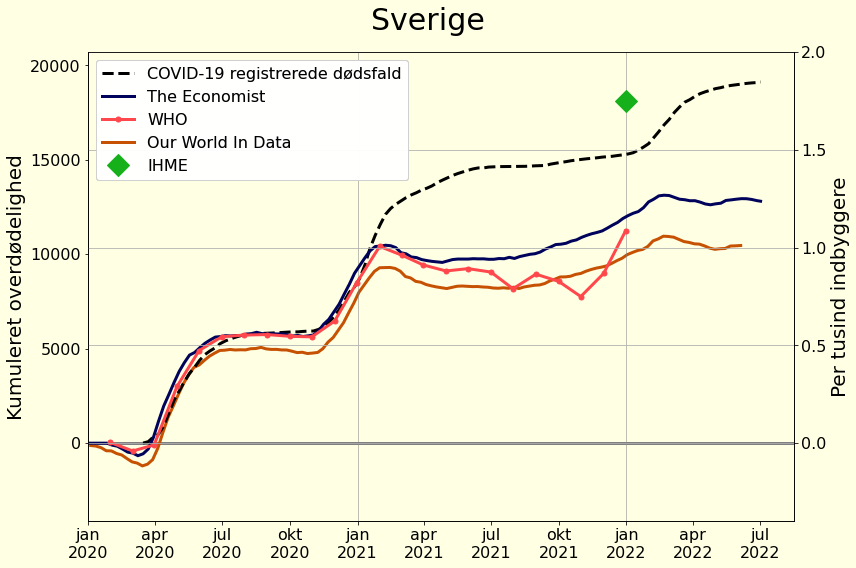

In [73]:
fig,ax = plt.subplots()

fig.patch.set_facecolor('xkcd:off white')
ax.set_facecolor('xkcd:off white')
ax2 = ax.twinx()


ax.axhline(0,color='gray',zorder=2)
ax.plot(df2SE.Day,df2SE['Total confirmed deaths due to COVID-19'],'--',zorder=5,label='COVID-19 registrerede dødsfald',color='k')

# ax.fill_between(df2SE.Day,df2SE['cumulative_estimated_daily_excess_deaths_ci_95_bot'],df2SE['cumulative_estimated_daily_excess_deaths_ci_95_top'],color='xkcd:light blue')
ax.plot(df2SE.Day,df2SE['cumulative_estimated_daily_excess_deaths'],zorder=5,color='xkcd:dark blue',label='The Economist')


# ax.plot(curDates,dfSE['cumul.excess.mean'],'xkcd:light red',zorder=5,label='WHO')
# ax.step(curDates,dfSE['cumul.excess.mean'],where='post',color='xkcd:light red',zorder=5,label='WHO')
# ax.step(curDates+np.timedelta64(30,'D'),dfSE['cumul.excess.mean'],where='pre',color='xkcd:light red',zorder=5,label='WHO')
ax.plot(curDates+np.timedelta64(30,'D'),dfSE['cumul.excess.mean'],'.-',color='xkcd:light red',zorder=5,label='WHO')
# ax.stairs(curDates,dfSE['cumul.excess.mean'],color='xkcd:light red',zorder=5,label='WHO')
# ax.fill_between(curDates,dfSE['cumul.excess.high'],dfSE['cumul.excess.low'],color='xkcd:light brown',zorder=3,label='95% konfidensinterval')

ax.plot(df6SE.date,df6SE['cum_excess_proj_all_ages'],color='xkcd:dark orange',label='Our World In Data')

# IHMEtime = np.arange(np.datetime64('2021-12-01'),np.datetime64('2021-12-01'))
ax.plot(np.datetime64('2022-01-01'),df3SE[df3SE.measure_name == 'excess_deaths']['mean_value'],'D',color='xkcd:green',markersize=15,zorder=3,label='IHME')


ax.legend(loc='upper left')

ax.grid(axis='y')
ax.axvline(np.datetime64('2020-01-01'),color='gray',linewidth=0.5,zorder=2)
ax.axvline(np.datetime64('2021-01-01'),color='gray',linewidth=0.5,zorder=2)
ax.axvline(np.datetime64('2022-01-01'),color='gray',linewidth=0.5,zorder=2)

ax.set_ylabel('Kumuleret overdødelighed',fontsize=20)

fig.suptitle('Sverige',fontsize=30)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))

ax.set_xlim(left=np.datetime64('2020-01-01'))

curYlim = ax.get_ylim()
newy0 = curYlim[0]/popSE
newy1 = curYlim[1]/popSE
ax2.set_ylim([1000*newy0,1000*newy1])
ax2.set_ylabel('Per tusind indbyggere',fontsize=20)



miny2 = -0.4
maxy2 = 2
ax2.set_ylim([miny2,maxy2])
ax.set_ylim([popSE*miny2/1000,popSE*maxy2/1000])

ax.grid(False)
ax2.grid(True,zorder=-1)
# first_legend = ax.legend(loc='upper left')

handles1, labels1 = ax.get_legend_handles_labels()
first_legend = plt.legend(handles1, labels1, loc='upper left')
ax2.add_artist(first_legend)

fig.tight_layout()


if saveFigures:
    fig.savefig('../Figures/ExcessSverige')

In [248]:
# fig,ax = plt.subplots()

# # ax.step(curDates,dfSE['cumul.excess.mean'],color='xkcd:light red',zorder=5,label='WHO')
# ax.stairs(dfSE['cumul.excess.mean'].values[:-1],curDates)